#### Prediction using Supervised Machine Learning

-Predicting Purchase using Black Friday Sales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
black_friday = pd.read_csv('black_friday.csv')
black_friday

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
#checking for the shape of the dataset
black_friday.shape

(550068, 12)

Checking for the information about the DataFrame

In [4]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Exploratory Data Analysis

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

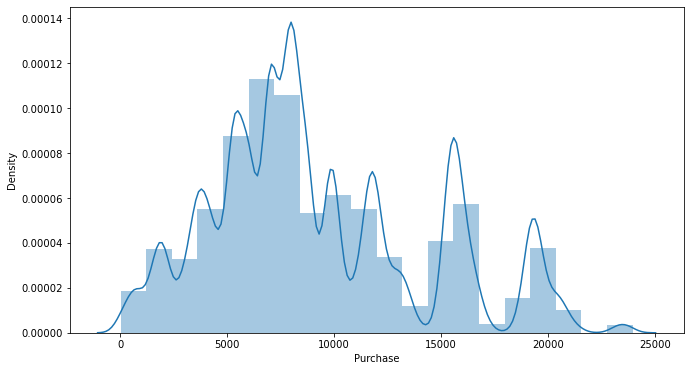

In [5]:
#distribution plot for 'Purchase'
plt.figure(figsize=(11,6))
sns.distplot(black_friday['Purchase'], bins = 20)

<AxesSubplot:xlabel='Gender', ylabel='count'>

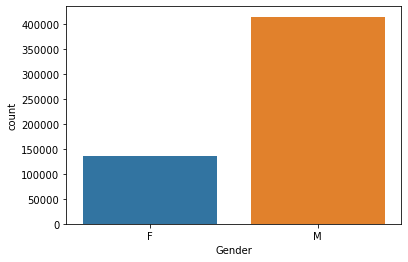

In [6]:
#countplot for 'Gender'
sns.countplot(black_friday['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

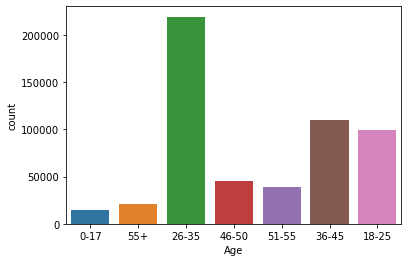

In [7]:
#countplot for 'Age'
sns.countplot(black_friday['Age'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

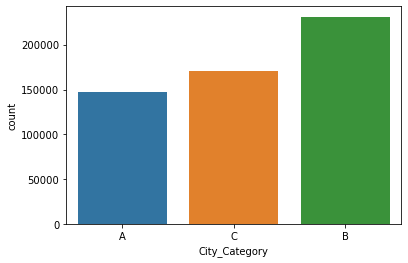

In [8]:
#countplot for 'City Category'
sns.countplot(black_friday['City_Category'])

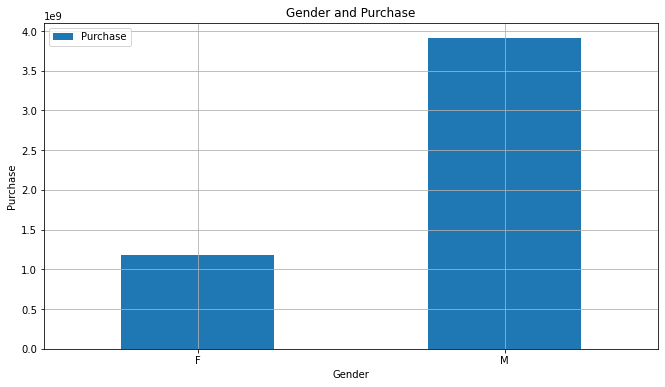

In [9]:
#gender and purchase of customers
gender_plot = black_friday.pivot_table(index = 'Gender', values = 'Purchase', aggfunc = np.sum)
gender_plot.plot(kind='bar', figsize=(11,6))
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.title('Gender and Purchase')
plt.xticks(rotation=0)
plt.grid()
plt.show()

Checking for total number number of missing values
in each column

In [10]:
black_friday.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

##### Cleaning columns 'Age' and 'Stay_in_current_city_years'

Finding the unique elements in 'Age' column


In [11]:
black_friday['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

##### Grouping 'Age' by;

'Child, 

'Young Adult', 

'Adult'

and 

'Old'

In [12]:
def age(value):
    if '0-17' in value:
        value = value.replace('0-17', 'Child')
        return str(value)
    elif '18-25' in value:
        value = value.replace('18-25', 'Young Adult')
        return str(value)
    elif '26-35' in value:
        value = value.replace('26-35', 'Adult')
        return str(value)
    elif '36-45' in value:
        value = value.replace('36-45', 'Adult')
        return str(value)
    elif '46-50' in value:
        value = value.replace('46-50', 'Adult')
        return str(value)
    elif '51-55' in value:
        value = value.replace('51-55', 'Old')
        return str(value)
    else:
        value = value.replace('55+', 'Old')
        return str(value)
black_friday['Age'] = black_friday['Age'].apply(age)

In [13]:
black_friday['Age'].unique()

array(['Child', 'Old', 'Adult', 'Young Adult'], dtype=object)

Finding the unique elements in 'Stay_In_Current_City_Years' column

In [14]:
black_friday['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
def city(value):
    if '+' in value:
        value = value.replace('+', '')
        return int(value)
    else:
        return int(value)
black_friday['Stay_In_Current_City_Years'] = black_friday['Stay_In_Current_City_Years'].apply(city)

In [16]:
black_friday['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0], dtype=int64)

In [17]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,Child,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,Child,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Child,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,Child,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,Old,16,C,4,0,8,NaN,NaN,7969


#### Handling missing values 

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
#impute NaN value in columns 'Product_Category_2' with mean value of respected column
imputer = imputer.fit(black_friday.iloc[:, 9:11])
black_friday.iloc[:, 9:11] = imputer.transform(black_friday.iloc[:, 9:11])

In [20]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,Child,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,Child,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,Child,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,Child,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,Old,16,C,4,0,8,8.0,16.0,7969


##### Use label encoder to convert labels into categorical form

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
#encoding data into into labels for easy computing
black_friday = black_friday.apply(le.fit_transform)

In [24]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,1,10,0,2,0,2,6,12,6702
1,0,2376,0,1,10,0,2,0,0,4,10,12121
2,0,852,0,1,10,0,2,0,11,6,12,586
3,0,828,0,1,10,0,2,0,11,12,12,494
4,1,2734,1,2,16,2,4,0,7,6,12,6301


###### Correlation Matrix 

<AxesSubplot:>

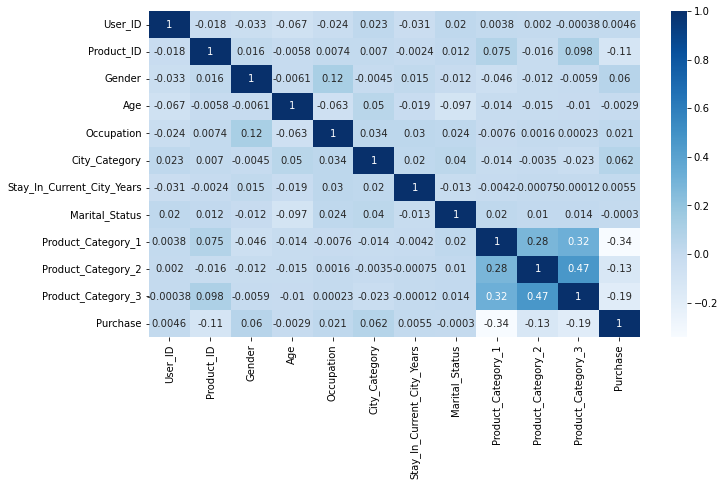

In [25]:
correlation = black_friday.corr()
plt.figure(figsize=(11,6))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

##### Drop unwanted columns;
User ID and Product ID

In [26]:
black_friday = black_friday.drop(['User_ID', 'Product_ID'], axis=1)
black_friday

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,2,6,12,6702
1,0,1,10,0,2,0,0,4,10,12121
2,0,1,10,0,2,0,11,6,12,586
3,0,1,10,0,2,0,11,12,12,494
4,1,2,16,2,4,0,7,6,12,6301
...,...,...,...,...,...,...,...,...,...,...
550063,1,2,13,1,1,1,19,6,12,126
550064,0,0,1,2,3,0,19,6,12,129
550065,0,0,15,1,4,1,19,6,12,34
550066,0,2,1,2,2,0,19,6,12,123


In [27]:
#checking the descriptive statistics of the dataset
black_friday.describe()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,0.789161,8.076707,1.042640,1.858418,0.409653,4.404270,7.260768,11.033263,7279.687840
std,0.431205,1.213107,6.522660,0.760211,1.289443,0.491770,3.936211,4.294093,2.584962,4099.665612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,6.000000,12.000000,4448.000000
50%,1.000000,0.000000,7.000000,1.000000,2.000000,0.000000,4.000000,6.000000,12.000000,6379.000000
75%,1.000000,2.000000,14.000000,2.000000,3.000000,1.000000,7.000000,12.000000,12.000000,9590.000000
max,1.000000,3.000000,20.000000,2.000000,4.000000,1.000000,19.000000,16.000000,14.000000,18104.000000


In [28]:
x = black_friday.drop(['Purchase'], axis = 1)
y = black_friday['Purchase']

In [29]:
x

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,0,2,0,2,6,12
1,0,1,10,0,2,0,0,4,10
2,0,1,10,0,2,0,11,6,12
3,0,1,10,0,2,0,11,12,12
4,1,2,16,2,4,0,7,6,12
...,...,...,...,...,...,...,...,...,...
550063,1,2,13,1,1,1,19,6,12
550064,0,0,1,2,3,0,19,6,12
550065,0,0,15,1,4,1,19,6,12
550066,0,2,1,2,2,0,19,6,12


In [30]:
pd.DataFrame(y)

,Purchase
0,6702
1,12121
2,586
3,494
4,6301
...,...
550063,126
550064,129
550065,34
550066,123


##### Model  Training

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [32]:
len(x_train)

440054

In [33]:
len(x_test)

110014

#### Feature Scaling with Standard Scaler 

In [34]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
ss = StandardScaler()
# transform data
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

### Using Linear Regression Model 

Training the model

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print('Model successfully trained')

Model successfully trained


#### Estimating the Training Prediction

y_train and y_pred should be matched for a successful prediction

In [36]:
# predicting y values with x_test
ypred = lr.predict(x_train)

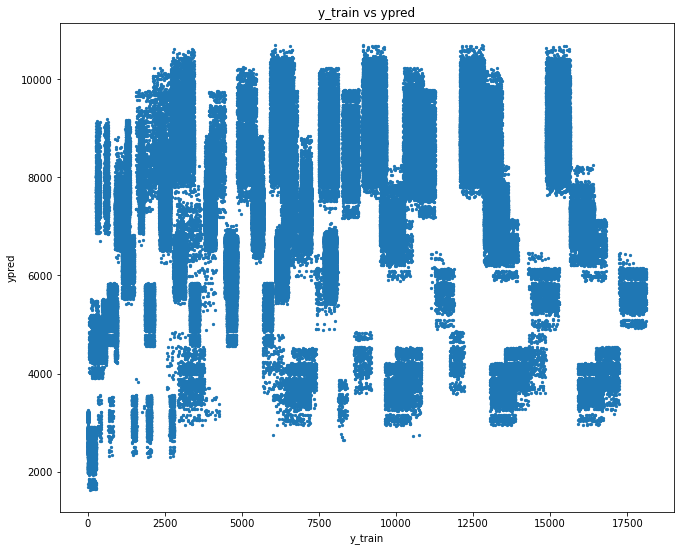

In [37]:
plt.figure(figsize=(11, 9))
plt.scatter(y_train, ypred, s=5)
plt.title('y_train vs ypred')
plt.xlabel('y_train')
plt.ylabel('ypred')
plt.show()

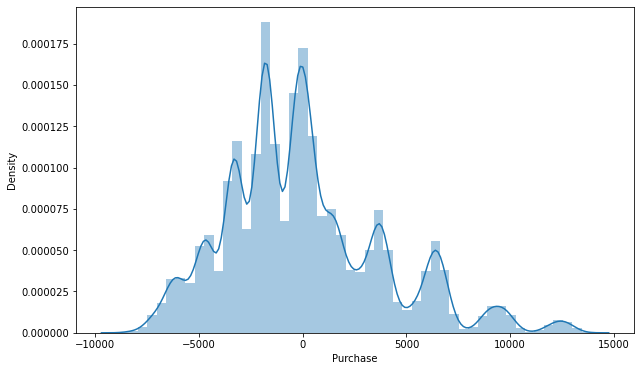

In [38]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 6))
# drawing the plot
sns.distplot(y_train-ypred, ax = ax)
plt.show()

#### Testing the model

In [39]:
ypred_test = lr.predict(x_test)

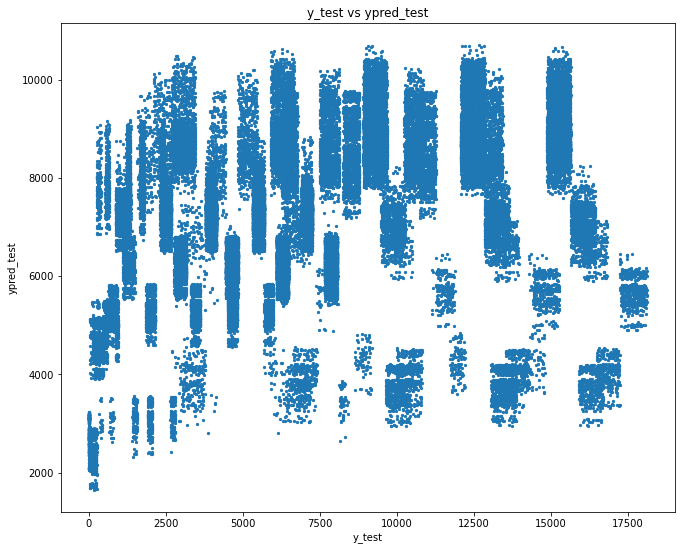

In [40]:
plt.figure(figsize=(11, 9))
plt.scatter(y_test,ypred_test, s=5)
plt.title('y_test vs ypred_test')
plt.xlabel('y_test')
plt.ylabel('ypred_test')
plt.show()

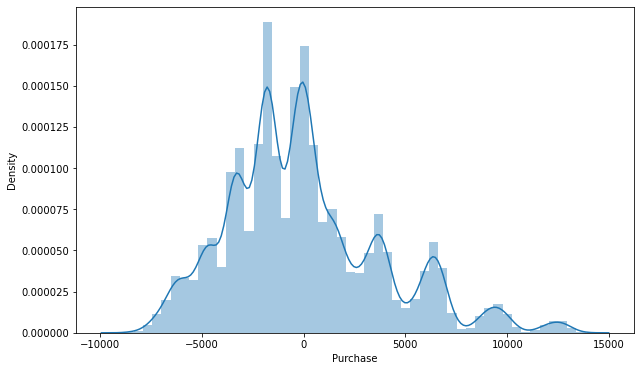

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
# drawing the plot
sns.distplot(y_test-ypred_test, ax = ax)
plt.show()

##### Comparing Actual and Predicted values 

In [42]:
black_friday_compare = pd.DataFrame({'Actual': y_test, 'Predicted':ypred_test})
black_friday_compare

,Actual,Predicted
483664,7747,9720.158554
179125,9555,8571.122246
148091,7721,6313.919078
384965,591,8609.037755
197871,6976,7082.840761
...,...,...
164214,4616,5618.057934
443661,10437,8350.036748
512804,15390,9968.395564
424100,7883,6715.175244


#### Calculating the Residual 

In [43]:
black_friday_compare['residual'] = black_friday_compare['Actual'] - black_friday_compare['Predicted']
black_friday_compare 

,Actual,Predicted,residual
483664,7747,9720.158554,-1973.158554
179125,9555,8571.122246,983.877754
148091,7721,6313.919078,1407.080922
384965,591,8609.037755,-8018.037755
197871,6976,7082.840761,-106.840761
...,...,...,...
164214,4616,5618.057934,-1002.057934
443661,10437,8350.036748,2086.963252
512804,15390,9968.395564,5421.604436
424100,7883,6715.175244,1167.824756


##### Calculating the % difference 

In [44]:
black_friday_compare['%difference'] = np.absolute(black_friday_compare['residual']/black_friday_compare['Actual']*100) 
black_friday_compare

,Actual,Predicted,residual,%difference
483664,7747,9720.158554,-1973.158554,25.469970
179125,9555,8571.122246,983.877754,10.296994
148091,7721,6313.919078,1407.080922,18.224076
384965,591,8609.037755,-8018.037755,1356.689976
197871,6976,7082.840761,-106.840761,1.531548
...,...,...,...,...
164214,4616,5618.057934,-1002.057934,21.708361
443661,10437,8350.036748,2086.963252,19.995815
512804,15390,9968.395564,5421.604436,35.228099
424100,7883,6715.175244,1167.824756,14.814471


In [45]:
black_friday_compare.describe()

,Actual,Predicted,residual,%difference
count,110014.000000,110014.000000,110014.000000,1.100140e+05
mean,7268.398113,7272.039306,-3.641193,inf
std,4105.974507,1474.997911,3834.258675,NaN
min,0.000000,1646.039097,-8786.333768,1.847218e-06
25%,4383.000000,6383.947931,-2516.814114,1.422944e+01
50%,6370.000000,7315.136147,-417.595162,3.288965e+01
75%,9584.000000,8449.339373,1868.015073,6.860892e+01
max,18104.000000,10698.243178,13845.946797,inf


In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ypred_test, squared=False)

3834.242977509298

### Using  Random Forest Regressor Model

Training the model

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
print('Model trained')

Model trained


##### Testing the model 

In [48]:
 # predicting the x_test using the random forest regressor
ypred_test2 = rf.predict(x_test)

#### Comparing Actual and Predicted values 

In [49]:
black_friday_compare2 = pd.DataFrame({'Actual': y_test, 'Predicted':ypred_test2})
black_friday_compare2

,Actual,Predicted
483664,7747,11189.237786
179125,9555,10687.989189
148091,7721,6305.140869
384965,591,1784.931652
197871,6976,5031.479341
...,...,...
164214,4616,6170.976652
443661,10437,6808.321747
512804,15390,12499.501333
424100,7883,6881.668934


##### Calculating the Residual 

In [50]:
black_friday_compare2['residual'] = black_friday_compare2['Actual'] - black_friday_compare2['Predicted']
black_friday_compare2

,Actual,Predicted,residual
483664,7747,11189.237786,-3442.237786
179125,9555,10687.989189,-1132.989189
148091,7721,6305.140869,1415.859131
384965,591,1784.931652,-1193.931652
197871,6976,5031.479341,1944.520659
...,...,...,...
164214,4616,6170.976652,-1554.976652
443661,10437,6808.321747,3628.678253
512804,15390,12499.501333,2890.498667
424100,7883,6881.668934,1001.331066


#### Calculating the % difference 

In [51]:
black_friday_compare2['%difference']=np.absolute(black_friday_compare2['residual']/black_friday_compare2['Actual']*100)
black_friday_compare2

,Actual,Predicted,residual,%difference
483664,7747,11189.237786,-3442.237786,44.433171
179125,9555,10687.989189,-1132.989189,11.857553
148091,7721,6305.140869,1415.859131,18.337769
384965,591,1784.931652,-1193.931652,202.018892
197871,6976,5031.479341,1944.520659,27.874436
...,...,...,...,...
164214,4616,6170.976652,-1554.976652,33.686669
443661,10437,6808.321747,3628.678253,34.767445
512804,15390,12499.501333,2890.498667,18.781668
424100,7883,6881.668934,1001.331066,12.702411


In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ypred_test2, squared=False)

2493.9240870773697

###  Using Gradient Boosting Regressor 

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
print('Model successfully trained')

Model successfully trained


#### Testing the model 

In [54]:
# predicting the x_test using the gradient boosting regressor
ypred_test3 = gb.predict(x_test)

#### Comparing Actual and Predicted values

In [55]:
black_friday_compare3 = pd.DataFrame({'Actual': y_test, 'Predicted':ypred_test3})
black_friday_compare3

,Actual,Predicted
483664,7747,9433.018966
179125,9555,10275.331361
148091,7721,6063.880643
384965,591,2514.098774
197871,6976,4743.948319
...,...,...
164214,4616,5805.776902
443661,10437,8861.002395
512804,15390,11284.858175
424100,7883,6305.657136


##### Calculating the residual 

In [56]:
black_friday_compare3['residual'] = black_friday_compare3['Actual'] - black_friday_compare3['Predicted']
black_friday_compare3

,Actual,Predicted,residual
483664,7747,9433.018966,-1686.018966
179125,9555,10275.331361,-720.331361
148091,7721,6063.880643,1657.119357
384965,591,2514.098774,-1923.098774
197871,6976,4743.948319,2232.051681
...,...,...,...
164214,4616,5805.776902,-1189.776902
443661,10437,8861.002395,1575.997605
512804,15390,11284.858175,4105.141825
424100,7883,6305.657136,1577.342864


###### Calculating the % diiference 

In [57]:
black_friday_compare3['%difference'] = np.absolute(black_friday_compare3['residual']/black_friday_compare['Actual']*100)
black_friday_compare3

,Actual,Predicted,residual,%difference
483664,7747,9433.018966,-1686.018966,21.763508
179125,9555,10275.331361,-720.331361,7.538790
148091,7721,6063.880643,1657.119357,21.462497
384965,591,2514.098774,-1923.098774,325.397424
197871,6976,4743.948319,2232.051681,31.996154
...,...,...,...,...
164214,4616,5805.776902,-1189.776902,25.775063
443661,10437,8861.002395,1575.997605,15.100102
512804,15390,11284.858175,4105.141825,26.674086
424100,7883,6305.657136,1577.342864,20.009424


In [58]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ypred_test3, squared=False)

2443.9771906191168

The ML algorithm that perform the best is the Gradient Boosting Regressor Model with RMSE = 2443